<a href="https://colab.research.google.com/github/ayakow1/ttic31220-japanparliament-analysis/blob/main/Top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Installation

In [1]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires llvmlite<0.40,>=0.39.0dev0, but you have llvmlite 0.40.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-pgjs97m2/hdbscan_39e1f0844e264251bb8c28163c2a655f
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-pgjs97m2/hdbscan_39e1f084

## Data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import sqlite3


In [6]:
conn = sqlite3.connect('/content/drive/MyDrive/議事録/raw_speech.db')

In [7]:
all = pd.read_sql_query(f'''SELECT * FROM raw_speech WHERE speech_date >= '2022-01-01' AND speech_date <= '2023-04-31' ''', conn)

In [8]:
docs = all['speech'].to_list()

In [9]:
conn.close()

## Topic Modeling

In [10]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

In [11]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_reviews = Top2Vec(documents=docs, embedding_model='universal-sentence-encoder-multilingual')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2023-05-09 20:31:23,983 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-05-09 20:31:47,292 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-05-09 20:31:56,037 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-09 20:32:56,541 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-09 20:34:22,087 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-09 20:34:27,748 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Total time taken (mins):  3


In [12]:
# show the total number of topics
model_reviews.get_num_topics() 

236

In [13]:
topic_sizes, topic_nums = model_reviews.get_topic_sizes()
print(topic_sizes[:10])  # get sizes of top 10 topics
np.sum(topic_sizes)

[3441 1429 1214 1145 1058  853  831  818  799  790]


50608

In [19]:
from scipy.special import softmax
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def my_wordcloud(topic_num, reduced=False):
    model_reviews._validate_topic_num(topic_num, reduced)
    word_score_dict = dict(zip( model_reviews.topic_words[topic_num],
                                        softmax(model_reviews.topic_word_scores[topic_num])))
    plt.figure(figsize=(16, 4),
                   dpi=200)
    plt.axis("off")
    plt.imshow(WordCloud(width=1600, height=400, mode='RGBA', background_color='black', \
     font_path='/content/drive/MyDrive/議事録/Arial Unicode.ttf', max_words=1000, max_font_size=200).generate_from_frequencies(word_score_dict))
    plt.title("Topic " + str(topic_num), loc='left', fontsize=25, pad=20)

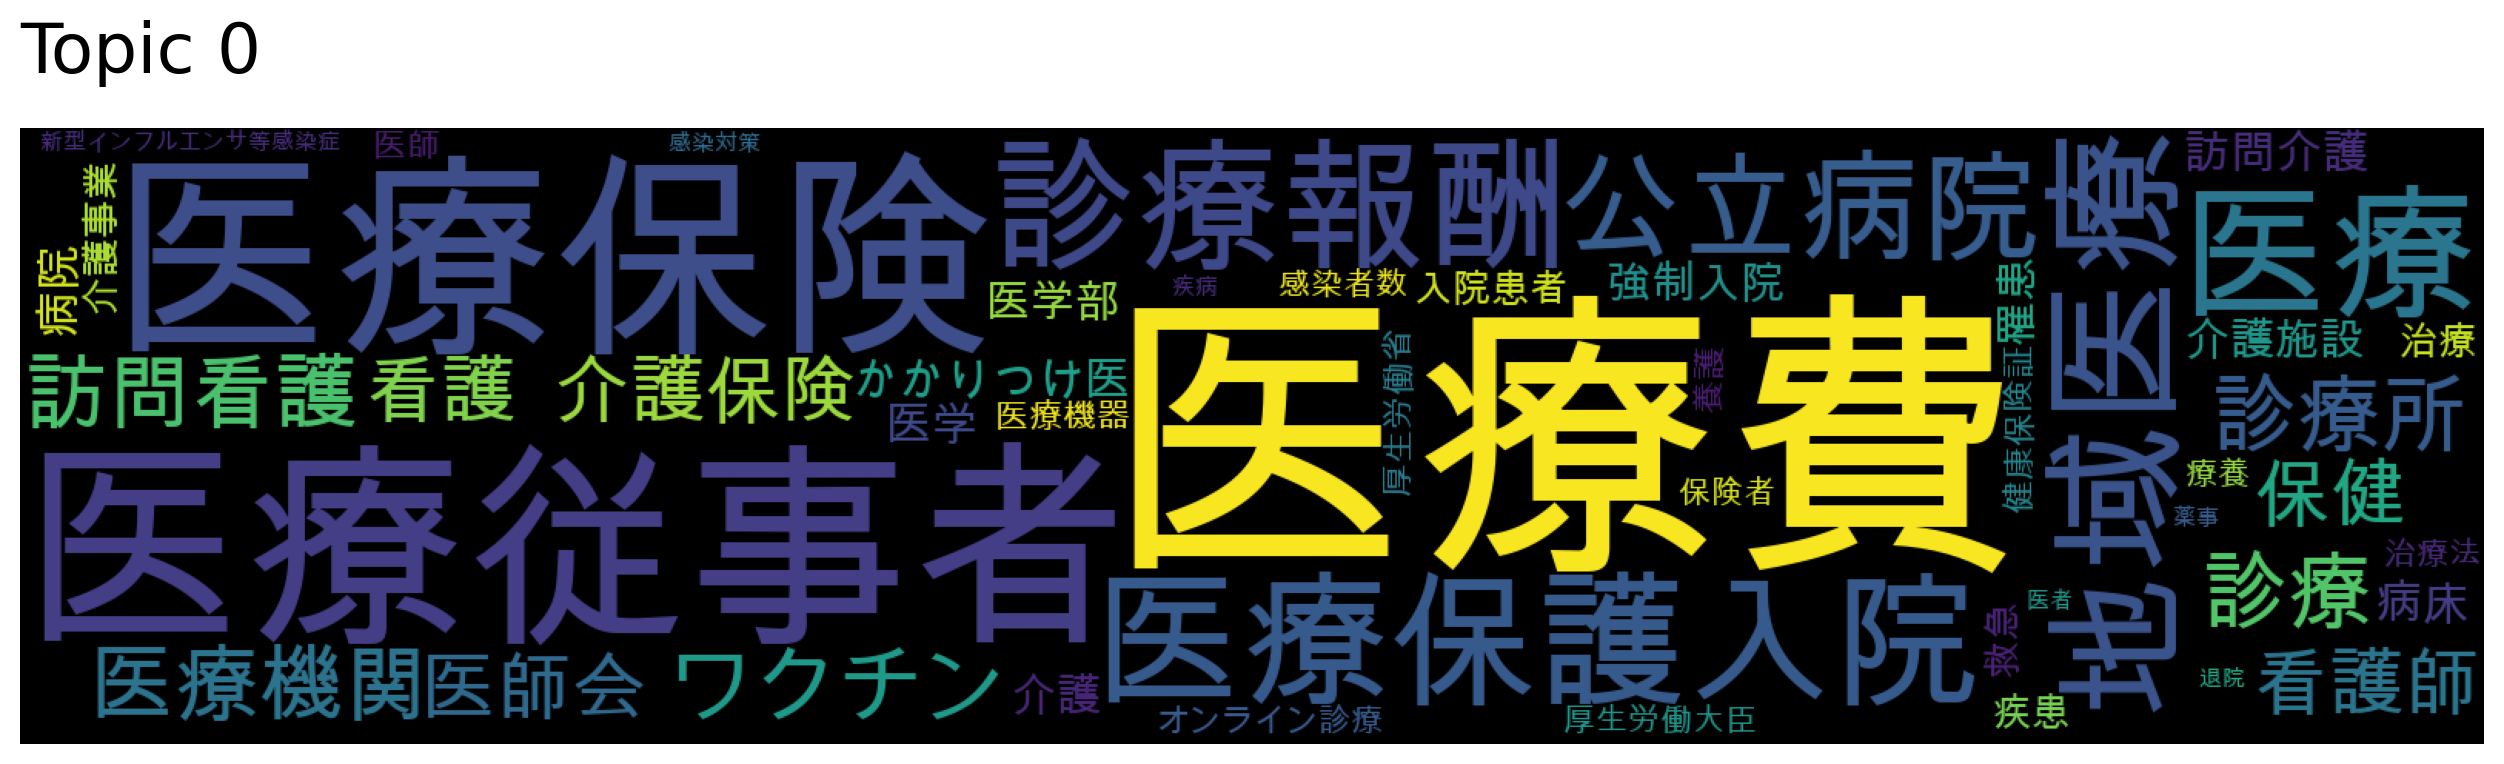

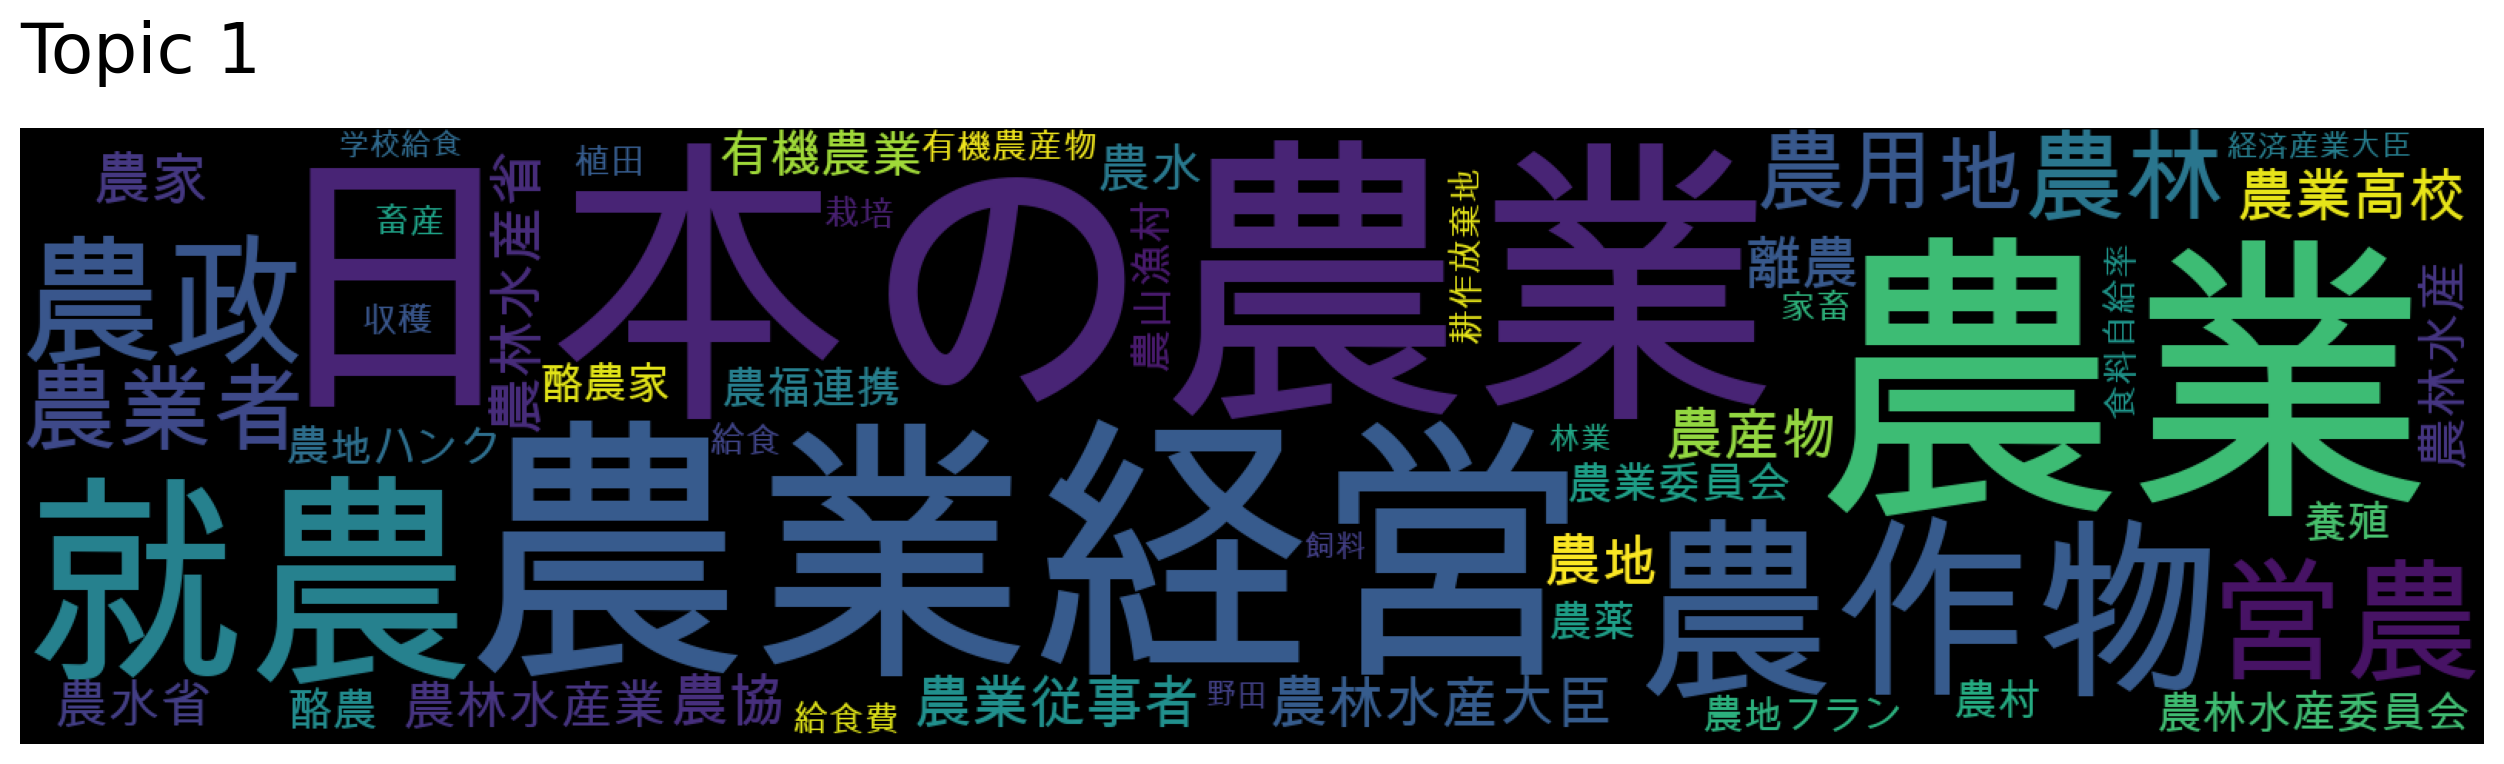

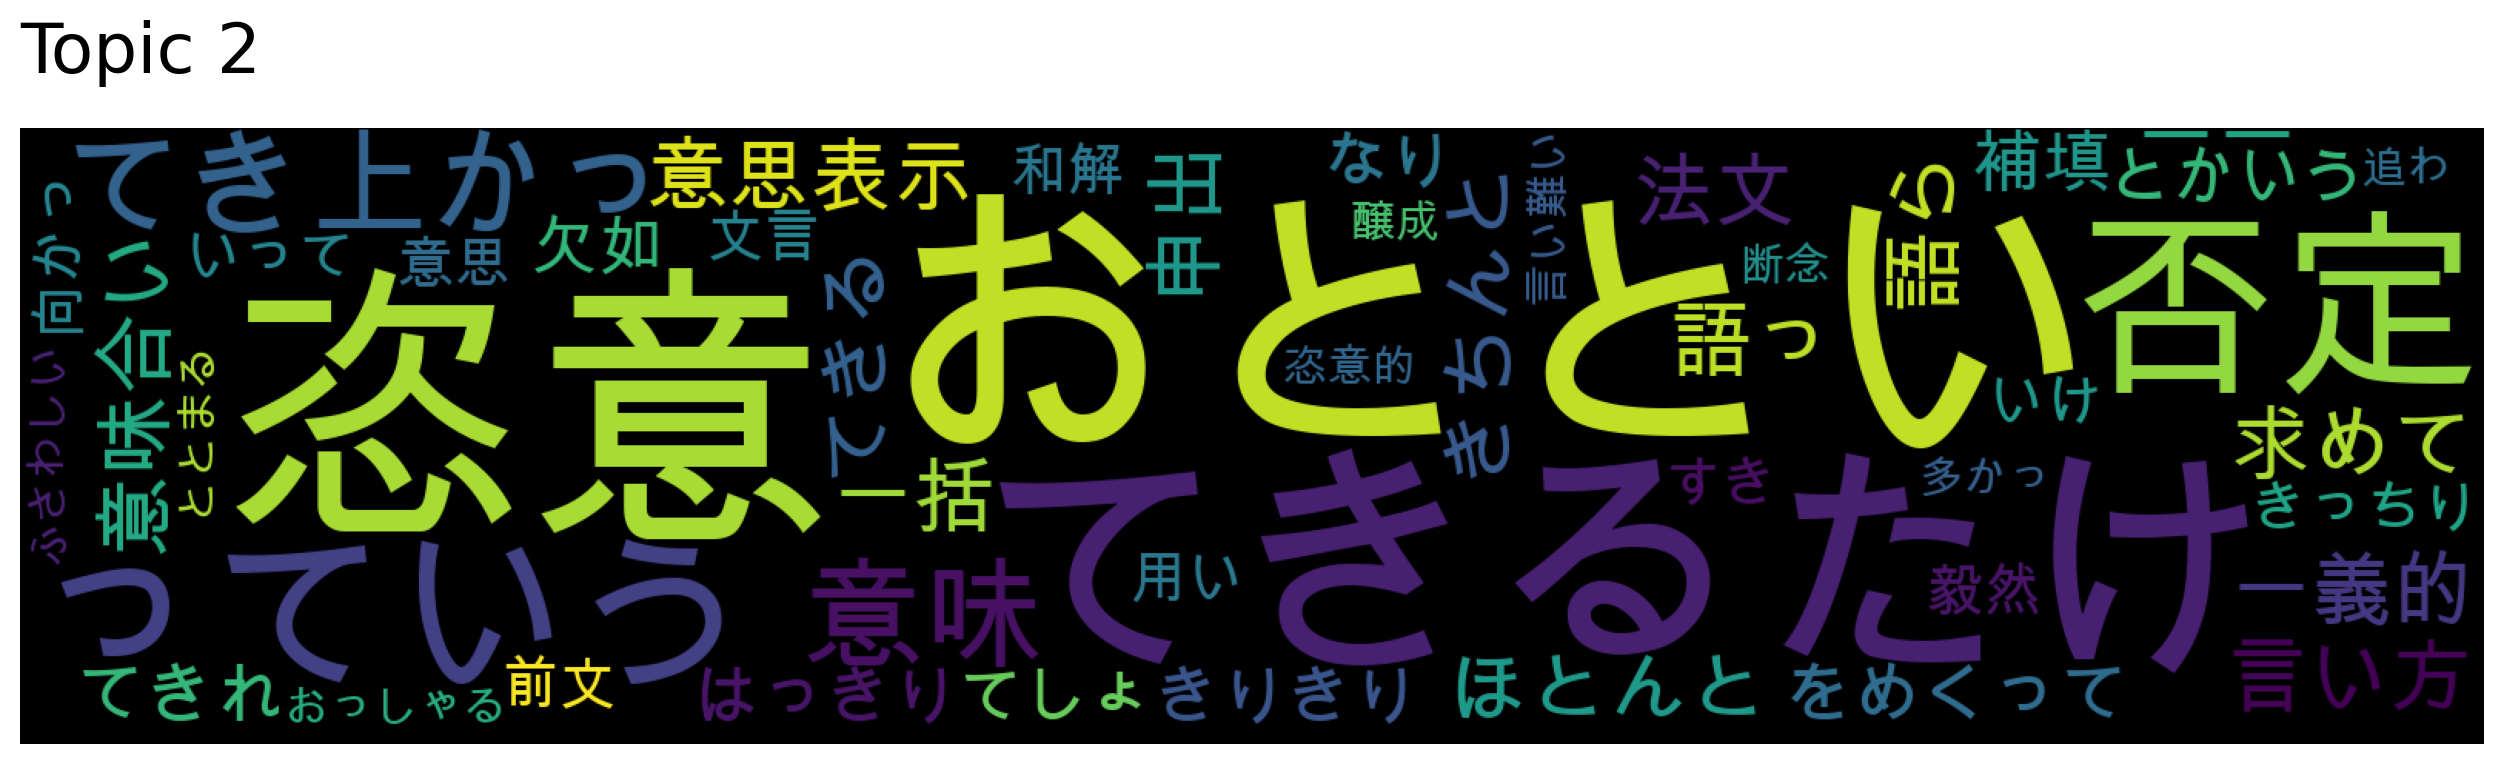

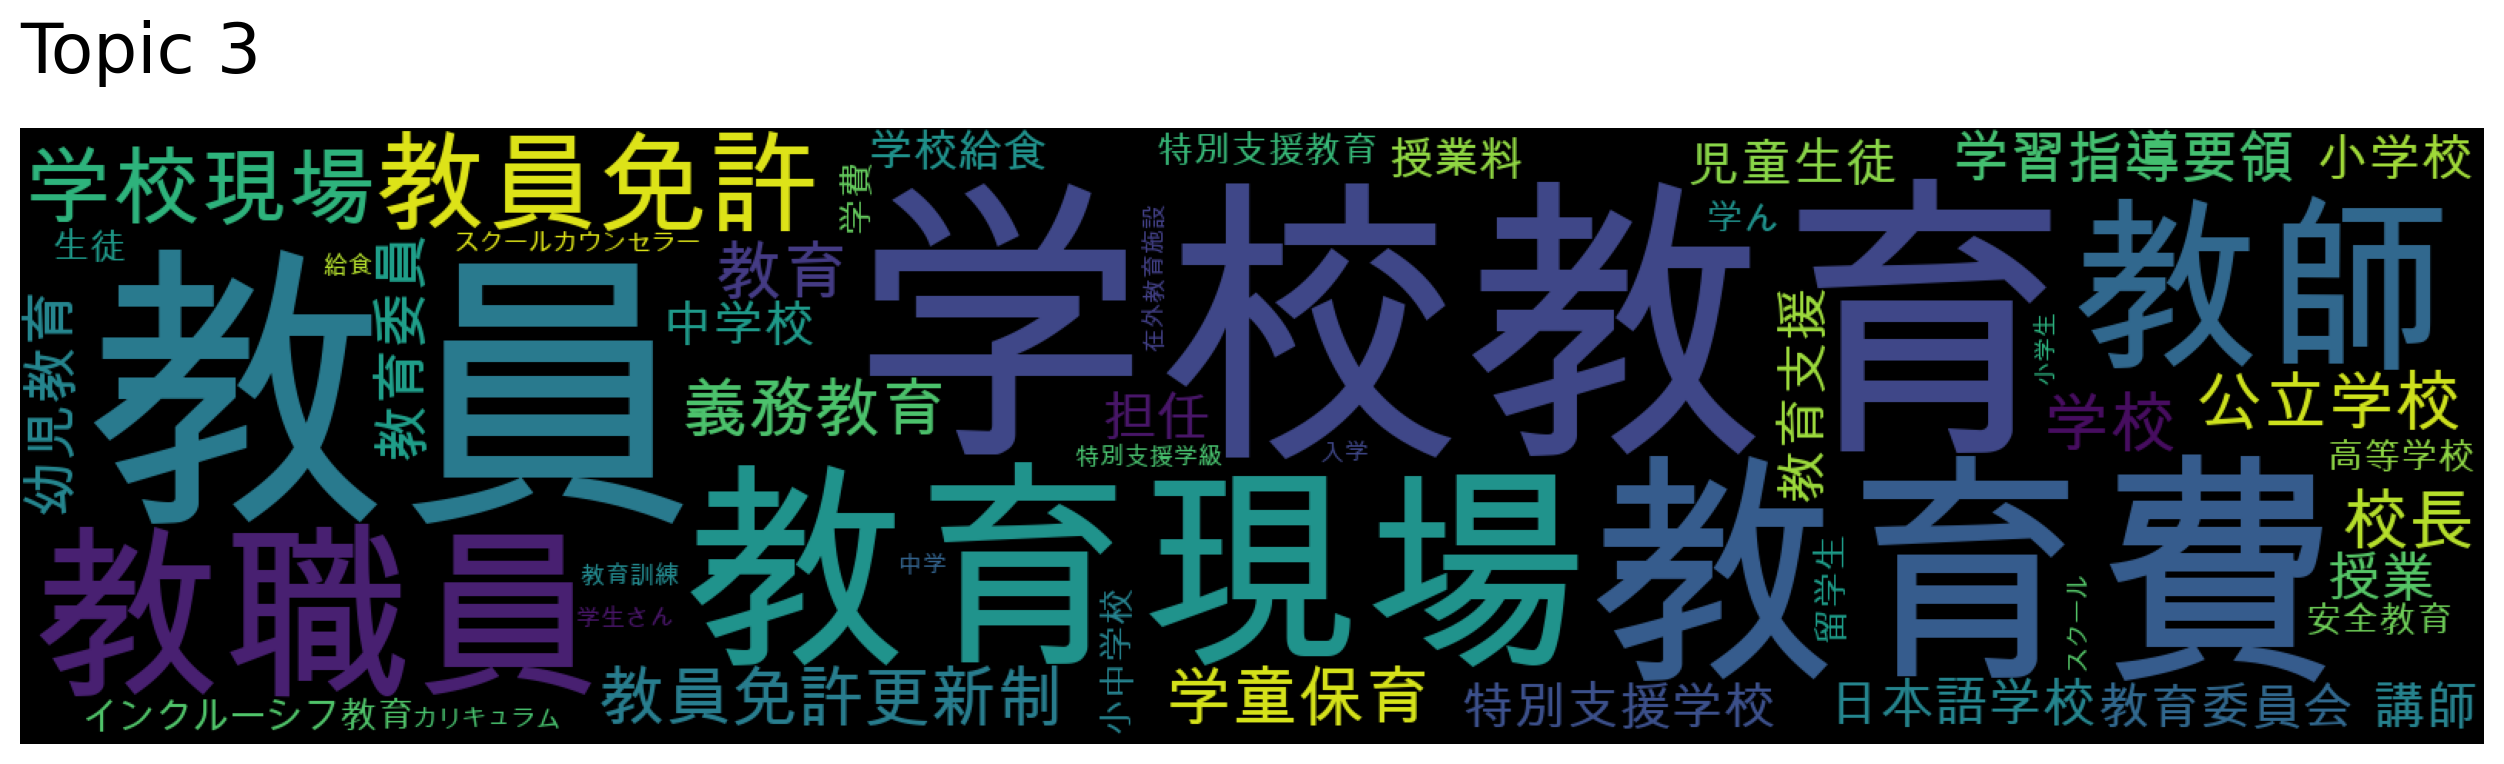

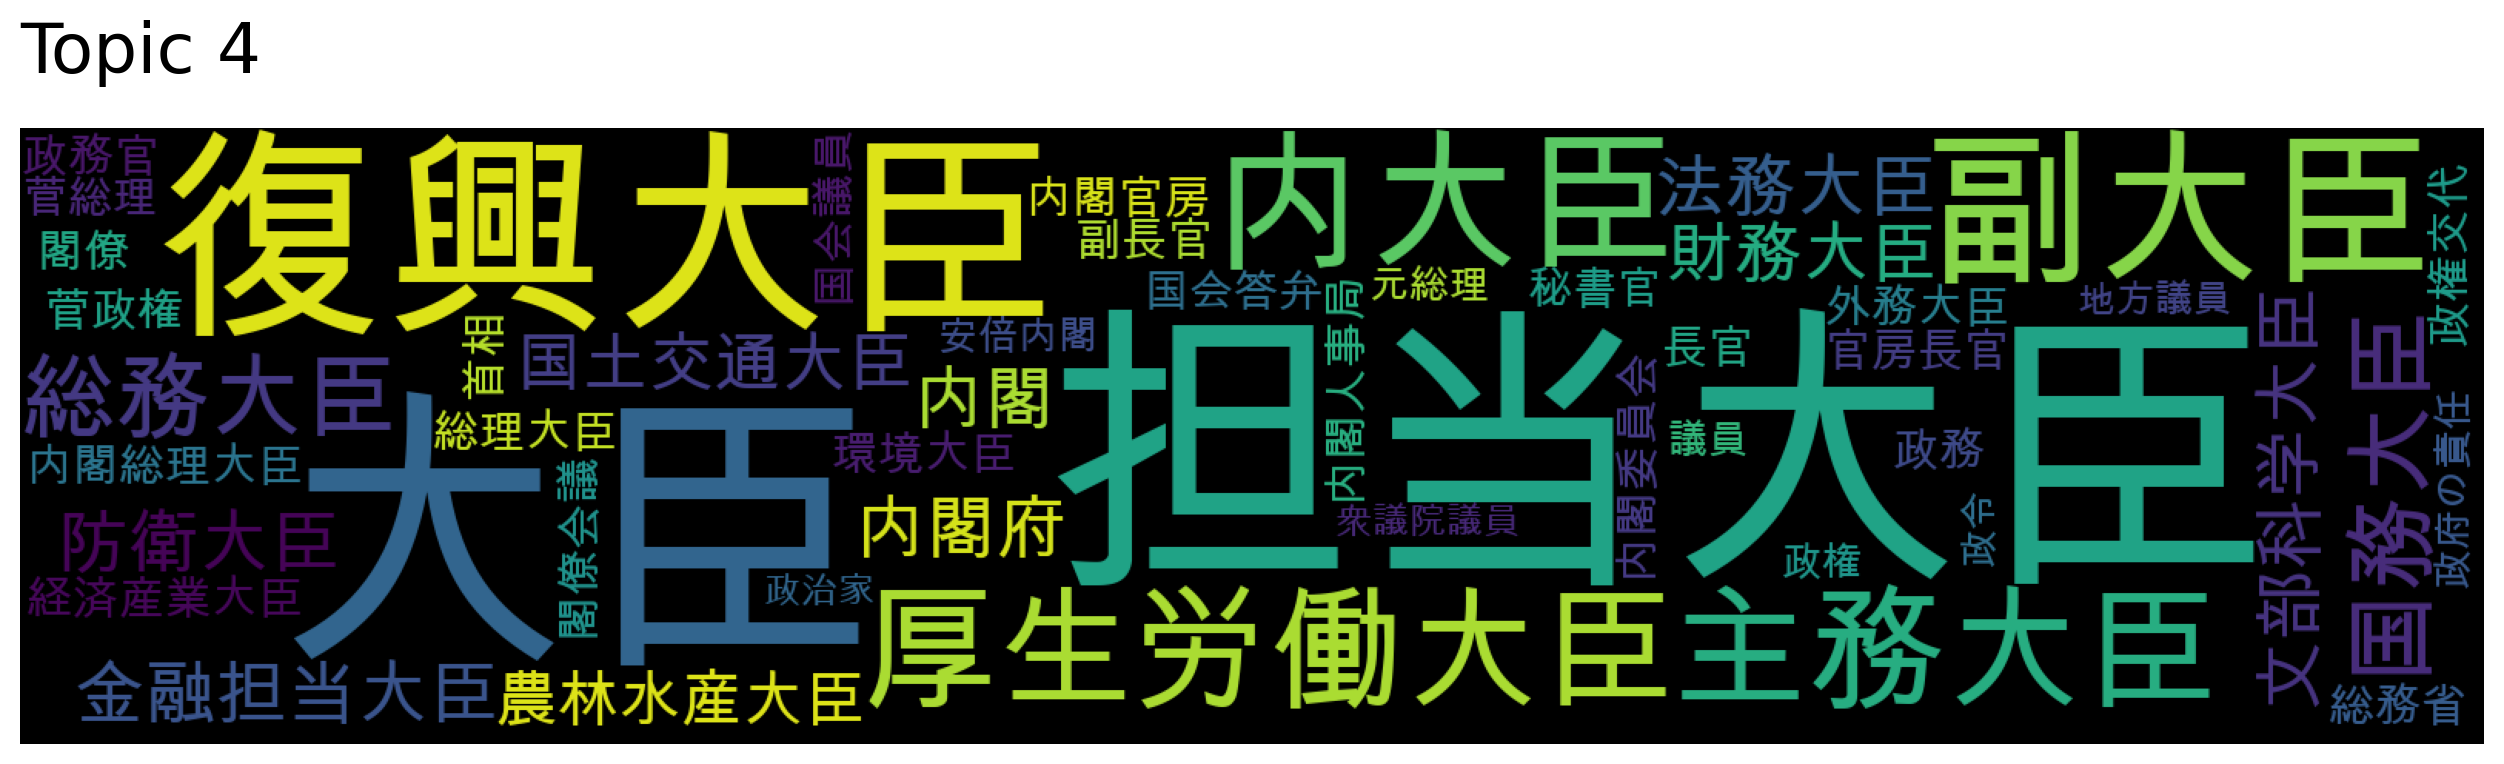

In [20]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:5]:
    my_wordcloud(topic)
    # model_reviews.generate_topic_wordcloud(topic)

In [23]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1130, Score: 0.8550410270690918
-----------
それでは 、 早速 、 感染症法 等 の 一部 を 改正 する 法律案 の 審議 に 入ら せ て いただき たい と 思い ます 。 まず 、 新型コロナ の 感染拡大 から 三 度目 の 秋 を 迎え て い ます 。 この間 、 度重なる 感染拡大 と 戦っ た 医療従事者 の 皆様 、 そして 政府 、 各 自治体 、 保健所 関係 の 皆様 の 熱心 な 対応 に まずは 感謝 を 申し上げ たい と 思い ます 。 ありがとう ござい ます 。 それでは 、 今回 、 感染症法 等 の 改正案 が 出さ れ て い ます ので 、 これ が 過去 の 課題 に どの よう に 対応 し て き た か 、 また 今後 、 取り 漏らし た 、 あるいは 今後 しっかり と 対応 す べき 課題 は 何 か という こと を 明らか に し つつ 、 議論 を 進め て いき たい と 考え て おり ます 。 まずは 外来 から です 。 コロナ禍 で の 外来 の 対応 状況 は どう だっ た でしょ う か 。 まず 、 感染拡大 当初 は 、 発熱 患者 の 診療 を 断る 医療機関 が 多く 生じ まし た 。 また 、 二 〇 二 〇 年 の 秋 から は 医療機関 に 補助金 を 入れ まし た ね 。 発熱 外来 を やる と 言っ た ん です けれども 、 問題 は 、 発熱 外来 の 実施 医療機関 が 公表 さ れ て い なかっ た 。 その せい で 、 国民 から 見る と 一体 何 の ため に お金 を 入れ た の か 分から なかっ た という こと が あり ます 。 そして 、 今年 の 夏 の 感染拡大 の とき に は 、 これ は 記憶 に 新しい の です けれども 、 発熱 患者 が 続出 し て 診療所 に 受診 し づらい という 状況 が あり まし た 。 それぞれ の 状況 に ボトルネック が 生じ て いる ん です けれども 、 この 重要 な 解決 策 の 一つ が 、 私 は オンライン診療 と リフィル 処方 だ と 考え て い ます 。 リフィル 処方 という の は 聞

In [21]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 11158, Score: 0.8825894594192505
-----------
大臣 、 今 、 一つ の 示唆 として 、 いわゆる 農地バンク 、 農地 の 中間 管理 機構 の 話 も さ れ まし た 。 残念 な ん です けれども 、 私 の 徳島県 は 、 実は 、 加盟 率 という か 、 非常 に 低い ん です よ 。 という こと は 、 やはり 、 国 の 、 今 大臣 が おっしゃっ た よう な 一つ の 示唆 として 、 方法 として 、 そういった 農地バンク 等々 を 活用 し て 担い手 を 探し て 、 その 方 に 委託 し て その 土地 を 活用 し て いただく 、 農業 を やっ て いただく 、 そういう ふう な 仕組み が 今後 国 として 、 そういった 零細 な 、 そして 点在 する 、 場合 によって は 土地 改良 の なさ れ て い ない 土地 を お 持ち の 方々 に 向け て の メッセージ として 十 分 伝わっ て い ない よう な 気 も し ます 。 です から 、 そういう 一つ の こと を 今日 おっしゃい まし た ので 、 私 も 地元 に 帰り まし て 、 そういう こと も 訴え て いき たい と 思い ます 。 お米 の 値段 も やはり 重要 で 、 それ が 、 担い手 が 法人 な の か 。 私 も さっき 、 冒頭 、 そういう 第二種 兼業農家 の 息子 で あっ た という こと を 申し まし た が 、 やはり 、 地元 で 、 例えば 一町 を 超え て 、 十町 近く お米 作り ばかり やっ て いる 農家 の 人 に 実際 耕作 し て もらっ て 、 栽培 し て いただい て 、 一部 の お米 を いただく よう な こと を 取っ て いる こと も あり まし た 。 ただ 、 そういう 方々 も 、 今 の 、 この ところ の コスト 高 、 もう やっ て い られ ない 、 やめよ う か な という 形 で 、 その 方 の 息子 さん 、 お孫さん が また 同じ よう な こと を する か と いう と 、 そう でも ない よう な 形 も あり ます ので 、 やはり これ は 

In [24]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=2, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 40566, Score: 0.8462009429931641
-----------
当たり前 です 、 これから これ じゃ 駄目 だ よ ね 、 だから 考え ます 。 今 いろいろ 一生懸命 出して いただける ん だ と 思い ます けれども 、 それ を どう 、 何 な ん だ という ところ 、 その 放置 し て い た こと について どう な ん です か という こと を 聞い て いる ん です よ 。 分から なかっ た という こと な ん です か 。
-----------

Document: 10573, Score: 0.8150620460510254
-----------
その 方 たち を しっかり と サポート し て いく ため に やっぱり 法律 に 、 こういう 通知 だけ じゃなくて 、 しっかり と 、 ここ 、 対象 として 国 が 支え て いく ん だ という こと を 明示 し なけれ ば なら ない という ふう に 考え て おり ます ので 、 その 言葉 の 定義 という 点 で は まだ これから 検討 の 余地 は ある かも しれ ませ ん けれども 、 是非とも よろしく お願い し たい と 思い ます 。 お 一言 、 御 答弁 いただけれ ば と 思い ます 。
-----------

Document: 50136, Score: 0.8136823773384094
-----------
その 上 で な ん です が 、 残ら れ た 頑張っ て いらっしゃる 方々 へ 、 仲間 が やめ て いか れる こと に対して の 負担 を 何とか 軽減 し て いく よう な もの という の は 今 は ない という こと な ん でしょ う か 。 そして 、 私 は 、 それ に対して 考え て ください と いう こと を 質問 し た ので 、 その こと に対して お答え ください 。
-----------

Document: 42574, Score: 0.80703204870224
-----------
連絡 を しよう と する という 手段 は 何 でも いい という こと な ので 、 なぜ それ を わざわざ 電話 以